In [1]:
import matplotlib.pyplot as plt
import numpy as np

f_0 = 10
f_c = 100
max_t_c = 1
c = 150
eps = 0.001
curr_pos   = 0      # in (micro)steps
target_pos = -100   # in (micro)steps
ksi        = 10     # steps away of center to be reached max speed
path       = abs(curr_pos - target_pos)


_dir = np.sign(target_pos - curr_pos)


def v1(x):
    return f_0 + a * x **2


def n1 (x, k=0):
    return f_0 * x + a * x**3/3 - k


def v2(x):
    return c*x + d


def n2 (x, k=0):
    return c * x ** 2/2 + d * x - \
        c * t_1**2/2 - d * t_1 + \
        N_1[-1] - k

def v3(x):
    return -a*(x - t_c) ** 2+ f_c


def n3(x, k=0):
    return f_c * x - a * (x - t_c)**3/3-\
      f_c * (t_c - t_1) + a * (t_c - t_1 - t_c)**3/3  +\
      N_2[-1] - k



In [2]:
###### tc calc
if f_c <= f_0:
    f_0 = f_c - 1;

N_1 = np.zeros(1)
N_2 = np.zeros(1)
tcl = 0
tcr = max_t_c
while(tcr - tcl > 0.01):
    t_c = (tcl + tcr) / 2
    a =  -(c ** 2) / (2 * (f_c - f_0 - c * t_c))
    d = f_0 - c ** 2 / (4*a)
    t_1 = c / (2*a)
    N_1[-1] = n1(t_1)
    N_2[-1] = n2(t_c - t_1)
    N_3 = n3(t_c)
    if(N_3 > path/2 - ksi):
        tcr = t_c
    else:
        tcl = t_c

        
if(f_c - f_0 - c*t_c > 0 or N_1[-1] < 3 or N_3 - N_2[-1] < 3):
    print("Error: can not reach target speed from current position. Cutting speed will be reduced");
    f_cr = c*max_t_c + f_0 - 10
    f_cl = 0
    while(f_cr - f_cl > 1):
        f_c = (f_cr + f_cl) / 2
        N_1 = np.zeros(1)
        N_2 = np.zeros(1)
        tcl = 0
        tcr = max_t_c
        while(tcr - tcl > 0.01):
            t_c = (tcl + tcr) / 2
            a =  -(c ** 2) / (2 * (f_c - f_0 - c * t_c))
            d = f_0 - c ** 2 / (4*a)
            t_1 = c / (2*a)
            N_1[-1] = n1(t_1)
            N_2[-1] = n2(t_c - t_1)
            N_3 = n3(t_c)
            if(N_3 > path/2 - ksi):
                tcr = t_c
            else:
                tcl = t_c

        if(f_c - f_0 - c*t_c > 0 or N_1[-1] < 3 or N_3 - N_2[-1] < 3):
            f_cr = f_c
        else:
            f_cl = f_c

print(f_c, t_c)


Error: can not reach target speed from current position. Cutting speed will be reduced
94.3359375 0.7734375


t_1 0.21119791666666668 a 355.11713933415535 d -5.83984375


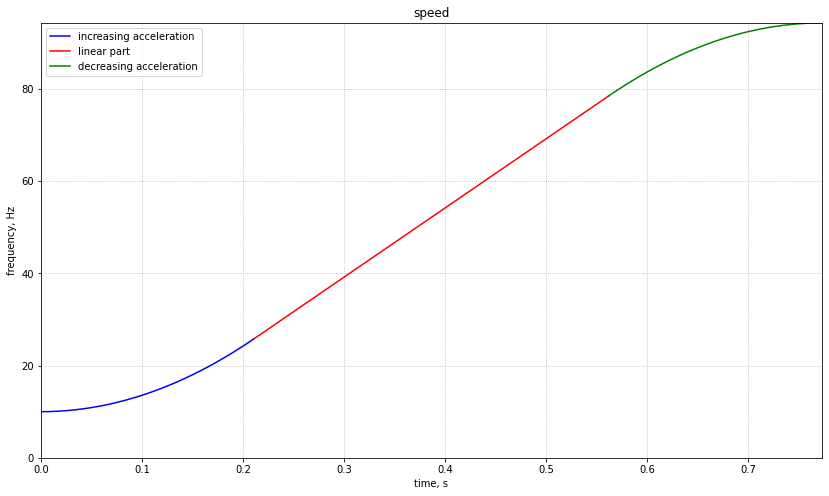

In [3]:
x = np.linspace(0, 10, 10000)
 
fig = plt.figure(figsize = (14, 8))

if f_c - f_0 - c*t_c > 0:
    t_c = (f_c - f_0) / c + eps
    print("warning: accelerating time will be greater than commanded. Try increasing parameter 'c'")
if c > (2 * f_c - 2*f_0)  / t_c:
    c = (2 * f_c - 2*f_0)  / t_c
    print("warning: maximal acceleration is never reached. You can decrease acceleration time")
a =  -(c ** 2) / (2 * (f_c - f_0 - c * t_c))
d = f_0 - c ** 2 / (4*a)
t_1 = c / (2*a)
print ("t_1", t_1, "a", a,"d", d)
# exp part
x1 = np.linspace(0, t_1, 10000)

y1 = v1(x1)
plt.plot(x1, y1, 'b', label ='increasing acceleration')

#linear part
x2 = np.linspace(t_1, t_c - t_1, 10000)

y2 = v2(x2)
plt.plot(x2, y2, 'r', label ='linear part')

x3 = np.linspace(t_c - t_1, t_c, 10000)

y3 = v3(x3)
plt.plot(x3, y3, 'g', label ='decreasing acceleration')

 
# Add features to our figure
plt.legend()
plt.grid(True, linestyle =':')
plt.xlim([0, t_c])
plt.ylim([0, f_c])
 
plt.title('speed')
plt.xlabel('time, s')
plt.ylabel('frequency, Hz')
 
# Show plot
plt.show()

total pulses: 40.34866333007813


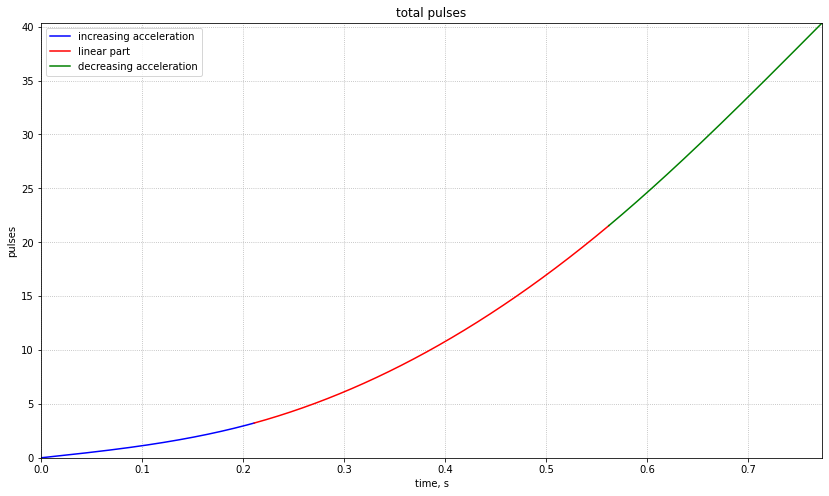

N_1 3.227093166775174 N_2 21.540223863389762 N_3 40.34866333007813


In [4]:
fig = plt.figure(figsize = (14, 8))


N_1 = n1(x1)
plt.plot(x1, N_1, 'b', label ='increasing acceleration')


N_2 = n2(x2)
plt.plot(x2, N_2, 'r', label ='linear part')

N_3 = n3(x3)

print('total pulses:', N_3[-1])
plt.plot(x3, N_3, 'g', label ='decreasing acceleration')
# Add features to our figure
plt.legend()
plt.grid(True, linestyle =':')
plt.xlim([0, t_c])
plt.ylim([0, N_3[-1]])
 
plt.title('total pulses')
plt.xlabel('time, s')
plt.ylabel('pulses')
 
# Show plot
plt.show()
print("N_1", N_1[-1],"N_2", N_2[-1],"N_3", N_3[-1])

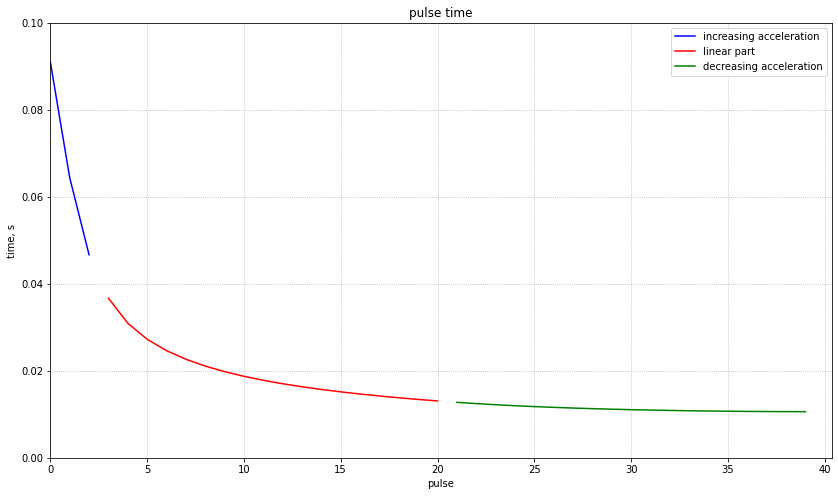

step  0 , time  0.1
step  1 , time  0.09106165686377095
step  2 , time  0.06443384709662954
step  3 , time  0.04668106923261034
step  4 , time  0.03671143702723523
step  5 , time  0.030946517015813912
step  6 , time  0.027263155707385744
step  7 , time  0.024647051067431258
step  8 , time  0.022664842843252042
step  9 , time  0.021095608432050328
step  10 , time  0.019813204290512754
step  11 , time  0.018739627262562175
step  12 , time  0.017823690597252695
step  13 , time  0.017030220288833386
step  14 , time  0.01633413808725015
step  15 , time  0.015717015781073485
step  16 , time  0.01516496634481479
step  17 , time  0.01466729905668629
step  18 , time  0.014215631572154552
step  19 , time  0.013803286065968923
step  20 , time  0.013424867904899163
step  21 , time  0.013075965021323799
step  22 , time  0.012753732227810954
step  23 , time  0.012461329007083854
step  24 , time  0.01220423704911755
step  25 , time  0.011977311782723654
step  26 , time  0.011776474955444649
step  27 

In [5]:
# newton iteration method
newton_iterations = 10

fig = plt.figure(figsize = (14, 8))
p1 = np.linspace(0, N_1.astype(int)[-1], N_1.astype(int)[-1] + 1)
ttim1 = np.ones_like(p1) * 1/f_0 + eps
for i in range (newton_iterations):
    ttim1 = ttim1 - n1(ttim1, p1) / v1(ttim1) 
tim1 = ttim1 - np.roll(ttim1, 1)
tim1 = tim1[1:]
p1 = p1[1:] - 1
timings = np.array([1/f_0]);
timings = np.concatenate((timings, tim1), axis=0)
    
plt.plot(p1, tim1, 'b', label ='increasing acceleration')


p2 = np.linspace(N_1.astype(int)[-1], N_2.astype(int)[-1], N_2.astype(int)[-1] + 1 - N_1.astype(int)[-1])
ttim2 = np.ones_like(p2) * ttim1[-1]
for i in range (newton_iterations):
    ttim2 = ttim2 - n2(ttim2, p2) / v2(ttim2) 
tim2 = ttim2 - np.roll(ttim2, 1)
tim2 = tim2[1:]
p2 = p2[1:] - 1
timings = np.concatenate((timings, tim2), axis=0)
plt.plot(p2, tim2, 'r', label ='linear part')

p3 = np.linspace(N_2.astype(int)[-1], N_3.astype(int)[-1], N_3.astype(int)[-1] + 1 - N_2.astype(int)[-1])
ttim3 = np.ones_like(p3) * ttim2[-1]
for i in range (newton_iterations):
    ttim3 = ttim3 - n3(ttim3, p3) / v3(ttim3) 
tim3 = ttim3 - np.roll(ttim3, 1)
#tim3[0] = tim2[-1]
tim3 = tim3[1:]
p3 = p3[1:] - 1

plt.plot(p3, tim3, 'g', label ='decreasing acceleration')
timings = np.concatenate((timings, tim3), axis =0)

# Add features to our figure
plt.legend()
plt.grid(True, linestyle =':')
plt.xlim([0, N_3[-1]])
plt.ylim([0, 1/f_0])

 
plt.title('pulse time')
plt.xlabel('pulse')
plt.ylabel('time, s')
 
# Show plot
plt.show()


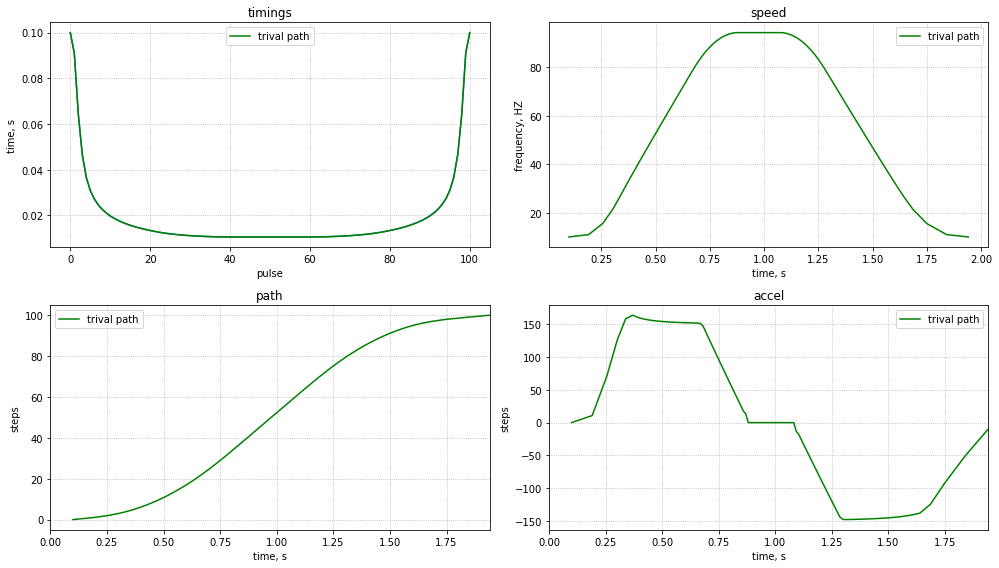

In [7]:
# trajectory planner

    
xt = np.linspace(0, path, path + 1)
T = np.zeros_like(xt)
for i in range(path + 1):
    if i < N_3[-1] - 1:
        T[i] = timings[i]
    elif i < path - N_3[-1] + 1:
        T[i] = 1/f_c
    else:
        T[i] = timings[int(path - i)]

        
fig, axs = plt.subplots(2, 2, figsize = (14, 8))


axs[0, 0].plot(xt, T)
axs[0, 0].set_title("timings")
axs[0, 0].plot(xt, T, 'g', label ='trival path')
axs[0, 0].legend()
axs[0, 0].grid(True, linestyle =':')
axs[0, 0].set_xlabel('pulse')
axs[0, 0].set_ylabel('time, s')


time = np.cumsum(T)
axs[0, 1].set_title("speed")
axs[0, 1].plot(time, 1/T, 'g', label ='trival path')
axs[0, 1].legend()
axs[0, 1].grid(True, linestyle =':')
axs[0, 1].set_xlabel('time, s')
axs[0, 1].set_ylabel('frequency, HZ')

time = np.cumsum(T)
axs[1, 0].set_title("path")
axs[1, 0].plot(time, xt, 'g', label ='trival path')
axs[1, 0].legend()
axs[1, 0].grid(True, linestyle =':')
axs[1, 0].set_xlabel('time, s')
axs[1, 0].set_xlim([0, time[-1]])
axs[1, 0].set_ylabel('steps')

axs[1, 1].set_title("accel")
axs[1, 1].plot(time, (1/T - 1/np.roll(T,1)) / T, 'g', label ='trival path')
axs[1, 1].legend()
axs[1, 1].grid(True, linestyle =':')
axs[1, 1].set_xlabel('time, s')
axs[1, 1].set_xlim([0, time[-1]])
axs[1, 1].set_ylabel('steps')

fig.tight_layout()